In [0]:
import cv2
import numpy as np
import glob
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# Read dataset and spliting x and y
dataset=pd.read_csv('/content/drive/My Drive/ML_HW03/dataset.csv')
X= dataset.iloc[:, :]
X=X.drop(columns=['im_name','Male'])
Y=dataset.iloc[:,7500:7502]

In [0]:
# Splite data to train and test and normalization
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=10,stratify=Y.iloc[:,1])
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [0]:
# Covariance matrix
cov_mat=np.cov(X_train_std.T)

In [0]:
# Eigen values and eigen vectors
eigen_vals, eigen_vects = np.linalg.eig(cov_mat)

/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


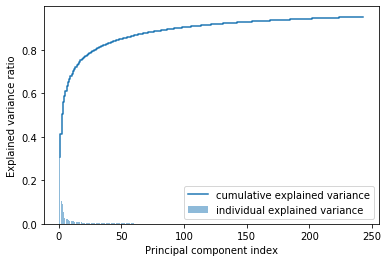

In [0]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
# by keeping 243 dimensions we have 95 percent of variance
plt.bar(range(1,244), var_exp[0:243], alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,244), cum_var_exp[0:243], where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [0]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vects[:, i]) for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [0]:
# Define W
#w = np.hstack((eigen_pairs[0][1][:, np.newaxis],eigen_pairs[1][1][:, np.newaxis]))
w=np.ndarray([7500,232])
for i in range(232):
  w[:,i]=eigen_pairs[i][1]
# PCA
X_train_pca = X_train_std.dot(w)
X_test_pca= X_test_std.dot(w)
print(X_train_pca.shape)
print(X_test_pca.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


(5714, 243)
(2449, 243)


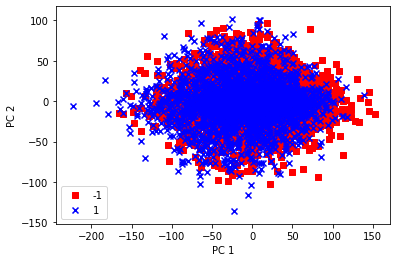

In [0]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(Y_train.iloc[:,1]), colors, markers):plt.scatter(X_train_pca[Y_train.iloc[:,1]==l, 0],X_train_pca[Y_train.iloc[:,1]==l, 1],c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_train_acc=[]
knn_test_acc=[]
# Accuracy for k=1 to 10
for k in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
  knn.fit(X_train_pca, Y_train.iloc[:,1])
  # Prediction
  Y_pred=knn.predict(X_test_pca)
  # Accuracy
  knn_train_acc.append(knn.score(X_train_pca,Y_train.iloc[:,1]))
  knn_test_acc.append(accuracy_score(Y_test.iloc[:,1],Y_pred))
#print(knn_score)
#print(acc_score)

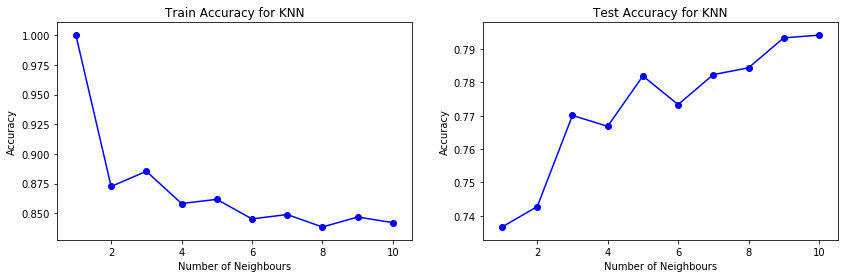

In [0]:
# Plotting accuracy For each k=0 to 10
x=np.arange(1,11)
plt.figure(figsize=(14,4))
# Train accuracy
plt.subplot(1,2,1)
plt.plot(x, knn_train_acc,color='blue')
plt.scatter(x, knn_train_acc,color='blue')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.title('Train Accuracy for KNN')
# Test accuracy
plt.subplot(1,2,2)
plt.plot(x, knn_test_acc,color='blue')
plt.scatter(x, knn_test_acc,color='blue')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.title('Test Accuracy for KNN')
plt.show()